# Coursera IBM Data Science Professional Certificate

## Capstone Project

This notebook is used for the final capstone project in the IBM Data Sceince Professional Certificate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calmap

print("Libraries Imported.")

Libraries Imported.


## 1. Getting NY car crashes data

The data was retrieved from the NYC Open Data website. It was filtered to only export rows from 2018 onwards.

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/data

## 2. Importing into Pandas

Let's import this CSV into a Pandas Dataframe

In [2]:
df = pd.read_csv("Data/NY_Crashes_From_2018.csv", parse_dates={"CRASH DATETIME":['CRASH DATE', 'CRASH TIME']})

df.head()

,CRASH DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-01-01 01:37:00,NaN,NaN,40.662277,-73.910780,"(40.662277, -73.91078)",BRISTOL STREET,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3819254,Sedan,Sedan,NaN,NaN,NaN
1,2018-01-01 00:27:00,QUEENS,11419.0,40.689133,-73.820860,"(40.689133, -73.82086)",124 STREET,103 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3821878,Sedan,Taxi,NaN,NaN,NaN
2,2018-01-01 14:30:00,NaN,NaN,40.804707,-73.919140,"(40.804707, -73.91914)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,0.0,...,Other Vehicular,NaN,NaN,NaN,3819072,Sedan,Box Truck,NaN,NaN,NaN
3,2018-01-01 06:07:00,BROOKLYN,11234.0,40.635185,-73.928620,"(40.635185, -73.92862)",UTICA AVENUE,GLENWOOD ROAD,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3820948,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2018-01-01 05:00:00,BROOKLYN,11212.0,40.656220,-73.913155,"(40.65622, -73.913155)",EAST 98 STREET,STRAUSS STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,3819289,Sedan,NaN,NaN,NaN,NaN


We can see the data mentioned the crash date and time, the location of the crash, as well the causes and injuries and fatalities associated with the crash. It also mentions the types of vehicles in the crash.

Let us see the size of the data

In [3]:
df.shape

(543420, 28)

It contains ~540k rows and 28 columns.

## 3. Cleaning the data

Now, we will do some preprocessing to clean the data and get it ready for analysis.

Note that since the data is from the US, CRASH DATE is in MM/DD/YYYY format

### Removing rows with no Latitude & Longitude data

The first step is to remove rows where latitude & longitude are not available, as the location of the crash is going to be vital for this project.

We can use the Location column for this task as it is the aggregate of Latitude and Longitude.

In [4]:
df.dropna(subset=['LOCATION'], inplace=True)

df.shape

(502989, 28)

We now have ~500k rows. More than enough.

### Changing all "Unspecified" values to NaN

Making it easier to process null values.

In [5]:
df = df.replace('Unspecified', np.nan)

### Dropping extra fatalities and injuries columns

We have 8 columns that count the fatalities and injuries in the crash. We don't really need the detail whether it was a motorist, cyclist, or a pedestrian. 

The "NUMBER OF PERSONS KILLED" and "NUMBER OF PEDESTRIANS INJURED" columns aggregate the different types and are sufficient for our use.

In [6]:
df.drop(['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'], axis='columns', inplace=True)

### Dropping extra contributing factors columns

There are a lot of columns listing the contributing factors, but we can see that only the first couple of columns have significant data. The dataset does not have a lot of information in the contributing factors 3, 4 and 5 columns.

In [7]:
print(f"Count of CONTRIBUTING FACTOR VEHICLE 3 = {df['CONTRIBUTING FACTOR VEHICLE 3'].notnull().sum()}")
print(f"Count of CONTRIBUTING FACTOR VEHICLE 4 = {df['CONTRIBUTING FACTOR VEHICLE 4'].notnull().sum()}")
print(f"Count of CONTRIBUTING FACTOR VEHICLE 5 = {df['CONTRIBUTING FACTOR VEHICLE 5'].notnull().sum()}")

Count of CONTRIBUTING FACTOR VEHICLE 3 = 2212
Count of CONTRIBUTING FACTOR VEHICLE 4 = 409
Count of CONTRIBUTING FACTOR VEHICLE 5 = 116


Considering the total dataset is of ~500k rows, we can consider these columns negligible.

In [8]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5'], axis = 1, inplace = True)

### Dropping extra Vehicle Type Code columns

Similarly, there are extra Vehicle Type Code columns 3, 4, and 5 which can be dropped due to the low amount of data.

In [9]:
print(f"Count of VEHICLE TYPE CODE 3 = {df['VEHICLE TYPE CODE 3'].notnull().sum()}")
print(f"Count of VEHICLE TYPE CODE 4 = {df['VEHICLE TYPE CODE 4'].notnull().sum()}")
print(f"Count of VEHICLE TYPE CODE 5 = {df['VEHICLE TYPE CODE 5'].notnull().sum()}")

df.drop(['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis = 1, inplace = True)

Count of VEHICLE TYPE CODE 3 = 33295
Count of VEHICLE TYPE CODE 4 = 7611
Count of VEHICLE TYPE CODE 5 = 2125


### Dropping extra Location columns

As it is only an aggregate of Latitude and Longitude columns, we can drop the LOCATION columns.

Furthermore, as we have the longitutde and latitude, the ON, CROSS, and OFF STREET NAME columns are unnecessary

In [10]:
df.drop(['LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'BOROUGH', 'ZIP CODE'], axis = 1, inplace = True)

### Moving COLLISION ID column to the beginning

Just to make things nice to look at.

In [11]:
df = df[ ['COLLISION_ID'] + [ col for col in df.columns if col != 'COLLISION_ID' ] ]

### Converting Injuries and Fatalities from float to int and removing NaNs

For nicer graphing.

In [12]:
df["NUMBER OF PERSONS INJURED"] = df["NUMBER OF PERSONS INJURED"].fillna(0)
df["NUMBER OF PERSONS KILLED"] = df["NUMBER OF PERSONS KILLED"].fillna(0)
df["NUMBER OF PERSONS INJURED"] = df["NUMBER OF PERSONS INJURED"].astype(int)
df["NUMBER OF PERSONS KILLED"] = df["NUMBER OF PERSONS KILLED"].astype(int)

### Resetting the index

We deleted some rows so the index doesn't match the rows. Let's fix that.

In [13]:
df.reset_index(inplace = True, drop = True)

### Eyeballing the final dataframe

Let's have a look at our cleaned dataframe:

In [14]:
df.tail()

,COLLISION_ID,CRASH DATETIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
502984,4369083,2020-11-17 08:05:00,40.611774,-74.07069,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
502985,4368497,2020-11-17 19:00:00,40.710800,-74.00342,0,0,NaN,NaN,Sedan,Box Truck
502986,4368866,2020-11-17 01:00:00,40.686844,-73.90945,0,0,View Obstructed/Limited,NaN,Station Wagon/Sport Utility Vehicle,NaN
502987,4368579,2020-11-17 17:15:00,40.856613,-73.86864,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
502988,4368547,2020-11-17 18:00:00,40.760742,-73.95693,0,0,Driver Inattention/Distraction,NaN,Sedan,Sedan


## 4. Initial statistical exploration of NYC crashes

Now is a good time to do some initial exploration and develop a sense of the data trends.

### Number of Crashes by Year

In [15]:
#defining new yearly dataframe
yearly_stats = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]

#grouping by year and getting total crashes per year
yearly_stats = yearly_stats.groupby(yearly_stats['CRASH DATETIME'].map(lambda x: x.year)).sum() 
yearly_crashes_count = df.groupby(df['CRASH DATETIME'].map(lambda x: x.year)).count()
yearly_stats["TOTAL CRASHES"] = yearly_crashes_count['CRASH DATETIME']

#adding Injury Rate and Fatality Rate columns
yearly_stats["INJURY RATE"] = (yearly_stats["NUMBER OF PERSONS INJURED"]/yearly_stats["TOTAL CRASHES"])* 100
yearly_stats["FATALITY RATE"] = (yearly_stats["NUMBER OF PERSONS KILLED"]/yearly_stats["TOTAL CRASHES"])* 100

#moving Total Crases column to first
yearly_stats = yearly_stats[ ['TOTAL CRASHES'] + [ col for col in yearly_stats.columns if col != 'TOTAL CRASHES' ] ]

yearly_stats

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH DATETIME,,,,,
2018,216443,58016,217,26.804286,0.100257
2019,194111,55907,227,28.801562,0.116943
2020,92435,35819,202,38.750473,0.218532


We can see that in 2018 and 2018, around 26-28% of crashes resulted in an injury, and around 0.1% of crashes resulted in a death.

This trend seems to have increased in 2020. There are lesser crashes, but they seem to be deadlier, looking at the higher injury and fatality rates.

There are a few important factors to consider in 2020:
    - The data is only available upto November 17, 2020
    - Due to the COVID-19 pandemic, there were periods of lockdown with less drivers and people on the road
    - Hospital services might have been underperforming due to COVID-19
    - Due to larger sample size, the data in 2018 and 2019 includes more accidents with no injuries and fatalities which skews the data

Considering November 17 is almost the end of the year, we can approximate 2020 as a full year.

Let's plot that.

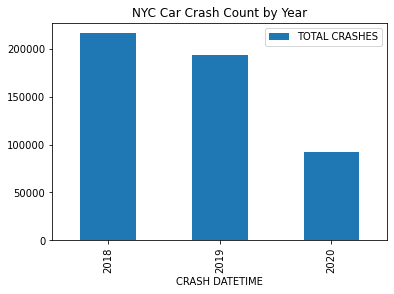

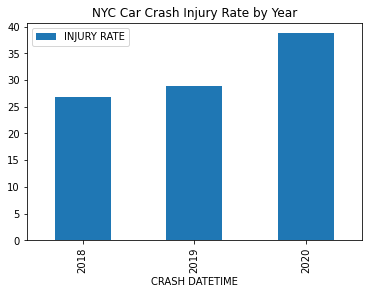

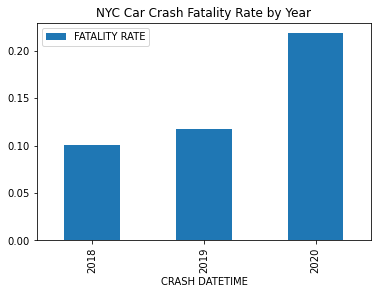

In [16]:
#plotting with pandas plot function
yearly_stats.plot(y = ["TOTAL CRASHES"], kind = "bar", title = "NYC Car Crash Count by Year")
yearly_stats.plot(y = ["INJURY RATE"], kind = "bar", title = "NYC Car Crash Injury Rate by Year")
yearly_stats.plot(y = ["FATALITY RATE"], kind = "bar", title = "NYC Car Crash Fatality Rate by Year")

### Number of Crashes by Month

We want to analyze whether there is a correlation between accidents on the road and the months. Possible impacts may be seasons, holidays, school/university breaks, and so on.

Let's generate the data filtered for each year - 2018, 2019 and 2020. We'll add an empty row at the end of 2020 as no December 2020 data is available as of now.

#### <center>2018</center>

In [17]:
#filtering for 2018 data and defining new monthly dataframe
df_2018 = df[(df['CRASH DATETIME'] < '2019-01-01')]
monthly_stats_2018 = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]

#grouping by year and getting total crashes per year
monthly_stats_2018 = monthly_stats_2018[(monthly_stats_2018['CRASH DATETIME'] < '2019-01-01')]
monthly_stats_2018 = monthly_stats_2018.groupby(monthly_stats_2018['CRASH DATETIME'].map(lambda x: x.month)).sum()
monthly_crashes_count_2018 = df_2018.groupby(df_2018['CRASH DATETIME'].map(lambda x: x.month)).count()
monthly_stats_2018["TOTAL CRASHES"] = monthly_crashes_count_2018['CRASH DATETIME']

#adding Injury Rate and Fatality Rate columns
monthly_stats_2018["INJURY RATE"] = (monthly_stats_2018["NUMBER OF PERSONS INJURED"]/monthly_stats_2018["TOTAL CRASHES"])* 100
monthly_stats_2018["FATALITY RATE"] = (monthly_stats_2018["NUMBER OF PERSONS KILLED"]/monthly_stats_2018["TOTAL CRASHES"])* 100

#moving Total Crases column to first
monthly_stats_2018 = monthly_stats_2018[ ['TOTAL CRASHES'] + [ col for col in monthly_stats_2018.columns if col != 'TOTAL CRASHES' ] ]

monthly_stats_2018

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH DATETIME,,,,,
1,17112,4246,12,24.812997,0.070126
2,15041,3798,15,25.250981,0.099727
3,18149,4493,18,24.756185,0.099179
4,17116,4432,15,25.893900,0.087637
5,19565,5375,14,27.472527,0.071556
6,19589,5333,20,27.224463,0.102098
7,18551,5222,17,28.149426,0.091639
8,18488,5266,17,28.483341,0.091952
9,17950,5175,29,28.830084,0.161560


#### <center>2019</center>

In [18]:
#filtering for 2019 data and defining new monthly dataframe
df_2019 = df[(df['CRASH DATETIME'] < '2020-01-01') & ((df['CRASH DATETIME'] >= '2019-01-01'))]
monthly_stats_2019 = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]

#grouping by year and getting total crashes per year
monthly_stats_2019 = monthly_stats_2019[(monthly_stats_2019['CRASH DATETIME'] < '2020-01-01') & (monthly_stats_2019['CRASH DATETIME'] >= '2019-01-01')]
monthly_stats_2019 = monthly_stats_2019.groupby(monthly_stats_2019['CRASH DATETIME'].map(lambda x: x.month)).sum()
monthly_crashes_count_2019 = df_2019.groupby(df_2019['CRASH DATETIME'].map(lambda x: x.month)).count()
monthly_stats_2019["TOTAL CRASHES"] = monthly_crashes_count_2019['CRASH DATETIME']

#adding Injury Rate and Fatality Rate columns
monthly_stats_2019["INJURY RATE"] = (monthly_stats_2019["NUMBER OF PERSONS INJURED"]/monthly_stats_2019["TOTAL CRASHES"])* 100
monthly_stats_2019["FATALITY RATE"] = (monthly_stats_2019["NUMBER OF PERSONS KILLED"]/monthly_stats_2019["TOTAL CRASHES"])* 100

#moving Total Crases column to first
monthly_stats_2019 = monthly_stats_2019[ ['TOTAL CRASHES'] + [ col for col in monthly_stats_2019.columns if col != 'TOTAL CRASHES' ] ]

monthly_stats_2019

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH DATETIME,,,,,
1,15633,4081,19,26.105034,0.121538
2,14764,3792,14,25.684096,0.094825
3,16328,4224,16,25.869672,0.097991
4,15430,4368,19,28.308490,0.123137
5,17976,5253,20,29.222296,0.111259
6,17844,5374,21,30.116566,0.117687
7,16944,5169,20,30.506374,0.118036
8,15802,4997,19,31.622579,0.120238
9,16157,4817,19,29.813703,0.117596


#### <center>2020</center>

In [19]:
#filtering for 2020 data and defining new monthly dataframe
df_2020 = df[(df['CRASH DATETIME'] < '2021-01-01') & ((df['CRASH DATETIME'] >= '2020-01-01'))]
monthly_stats_2020 = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]

#grouping by year and getting total crashes per year
monthly_stats_2020 = monthly_stats_2020[(monthly_stats_2020['CRASH DATETIME'] < '2021-01-01') & (monthly_stats_2020['CRASH DATETIME'] >= '2020-01-01')]
monthly_stats_2020 = monthly_stats_2020.groupby(monthly_stats_2020['CRASH DATETIME'].map(lambda x: x.month)).sum()
monthly_crashes_count_2020 = df_2020.groupby(df_2020['CRASH DATETIME'].map(lambda x: x.month)).count()
monthly_stats_2020["TOTAL CRASHES"] = monthly_crashes_count_2020['CRASH DATETIME']

#adding Injury Rate and Fatality Rate columns
monthly_stats_2020["INJURY RATE"] = (monthly_stats_2020["NUMBER OF PERSONS INJURED"]/monthly_stats_2020["TOTAL CRASHES"])* 100
monthly_stats_2020["FATALITY RATE"] = (monthly_stats_2020["NUMBER OF PERSONS KILLED"]/monthly_stats_2020["TOTAL CRASHES"])* 100

#moving Total Crases column to first
monthly_stats_2020 = monthly_stats_2020[ ['TOTAL CRASHES'] + [ col for col in monthly_stats_2020.columns if col != 'TOTAL CRASHES' ] ]

#adding an empty row for December 2020
monthly_stats_2020 = monthly_stats_2020.append(pd.Series(name='12', dtype='int64'))
monthly_stats_2020["TOTAL CRASHES"]["12"] = 0
monthly_stats_2020["NUMBER OF PERSONS INJURED"]["12"] = 0
monthly_stats_2020["NUMBER OF PERSONS KILLED"]["12"] = 0
monthly_stats_2020["INJURY RATE"]["12"] = 0
monthly_stats_2020["FATALITY RATE"]["12"] = 0

monthly_stats_2020["TOTAL CRASHES"] = monthly_stats_2020["TOTAL CRASHES"].astype(int)
monthly_stats_2020["NUMBER OF PERSONS INJURED"] = monthly_stats_2020["NUMBER OF PERSONS INJURED"].astype(int)
monthly_stats_2020["NUMBER OF PERSONS KILLED"] = monthly_stats_2020["NUMBER OF PERSONS KILLED"].astype(int)
monthly_stats_2020

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH DATETIME,,,,,
1,13161,3872,17,29.420257,0.129170
2,12566,3666,18,29.173961,0.143244
3,10229,2879,7,28.145469,0.068433
4,3792,1186,13,31.276371,0.342827
5,5680,2311,11,40.686620,0.193662
6,7022,3302,24,47.023640,0.341783
7,8523,3955,23,46.403848,0.269858
8,9044,4316,21,47.722247,0.232198
9,8852,4290,33,48.463624,0.372797


### Plotting month-wise data of crashes, injuries and fatalities for each year

Now that we have genereted the required data, we will go ahead and use matplotlib to generate side-by-side plots comparing the data.

#### <center>Total Crashes</center>

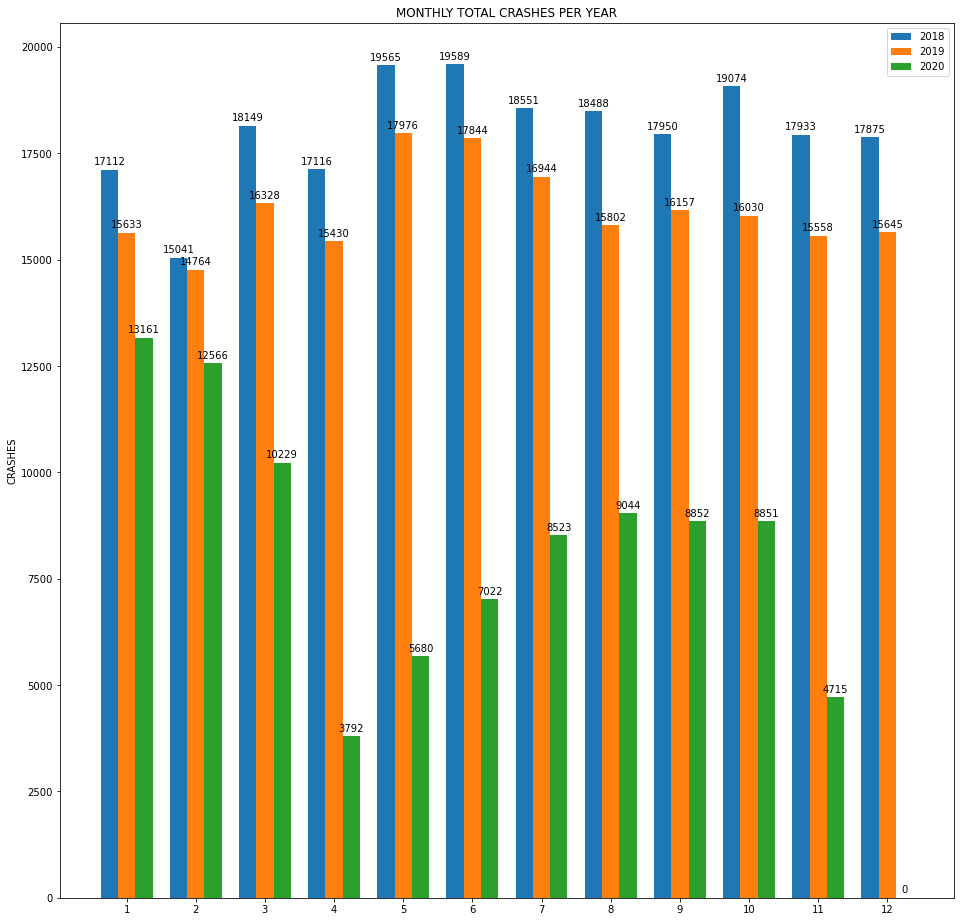

In [20]:
labels = ['1','2','3','4','5','6','7','8','9','10','11','12']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, monthly_stats_2018["TOTAL CRASHES"], width, label='2018')
rects2 = ax.bar(x, monthly_stats_2019["TOTAL CRASHES"], width, label='2019')
rects3 = ax.bar(x + width, monthly_stats_2020["TOTAL CRASHES"], width, label='2020')

ax.set_ylabel('CRASHES')
ax.set_title('MONTHLY TOTAL CRASHES PER YEAR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
fig.set_figwidth(15)
fig.set_figheight(15)

plt.show()

Looking over the total number of crashes, 2018 and 2019 seem to follow a general trend of having higher values during the summer months, especially May, June and July.

For 2020, we can see a sharp decline around April 2020, which coincides with the beginning of the lockdown period.

#### <center>Injury Rates</center>

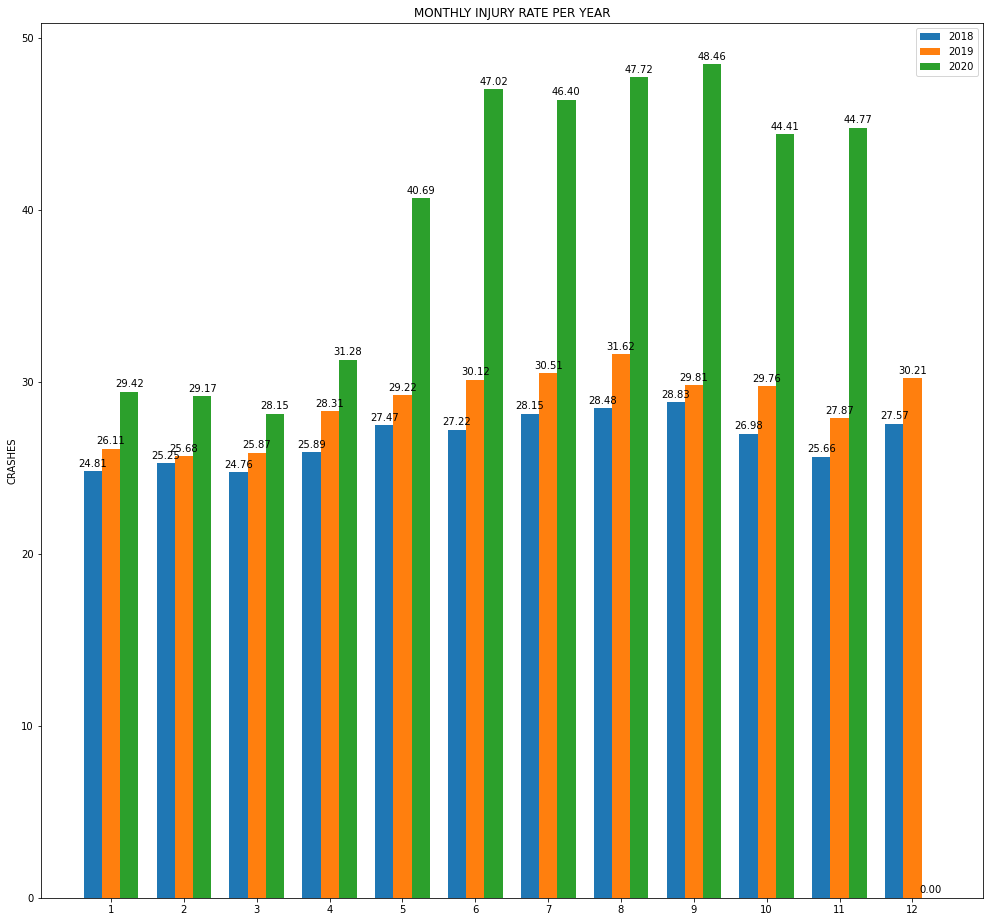

In [21]:
labels = ['1','2','3','4','5','6','7','8','9','10','11','12']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, monthly_stats_2018["INJURY RATE"], width, label='2018')
rects2 = ax.bar(x, monthly_stats_2019["INJURY RATE"], width, label='2019')
rects3 = ax.bar(x + width, monthly_stats_2020["INJURY RATE"], width, label='2020')

ax.set_ylabel('CRASHES')
ax.set_title('MONTHLY INJURY RATE PER YEAR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
fig.set_figwidth(15)
fig.set_figheight(15)

plt.show()

We can see a fairly even distribution of injuries throughout 2018 and 2019, however there seem to be more injuries in the summer months, and December. Interesting.

2020 is a wild ride where, until April, the values remain close to (but still higher - more injuries as years go by?) their 2018 and 2019 counterparts. However, we see a sharp increase in injuries post April 2020, which can point to multiple factors. COVID-19, stress on the medical infrastructure.

I assume the biggest factor for this skew might be the lessed number of collisions recorded during that timeframe. Which would decrease the ratio of the most common collision, one without any injury or death.

#### <center>Fatality Rates</center>

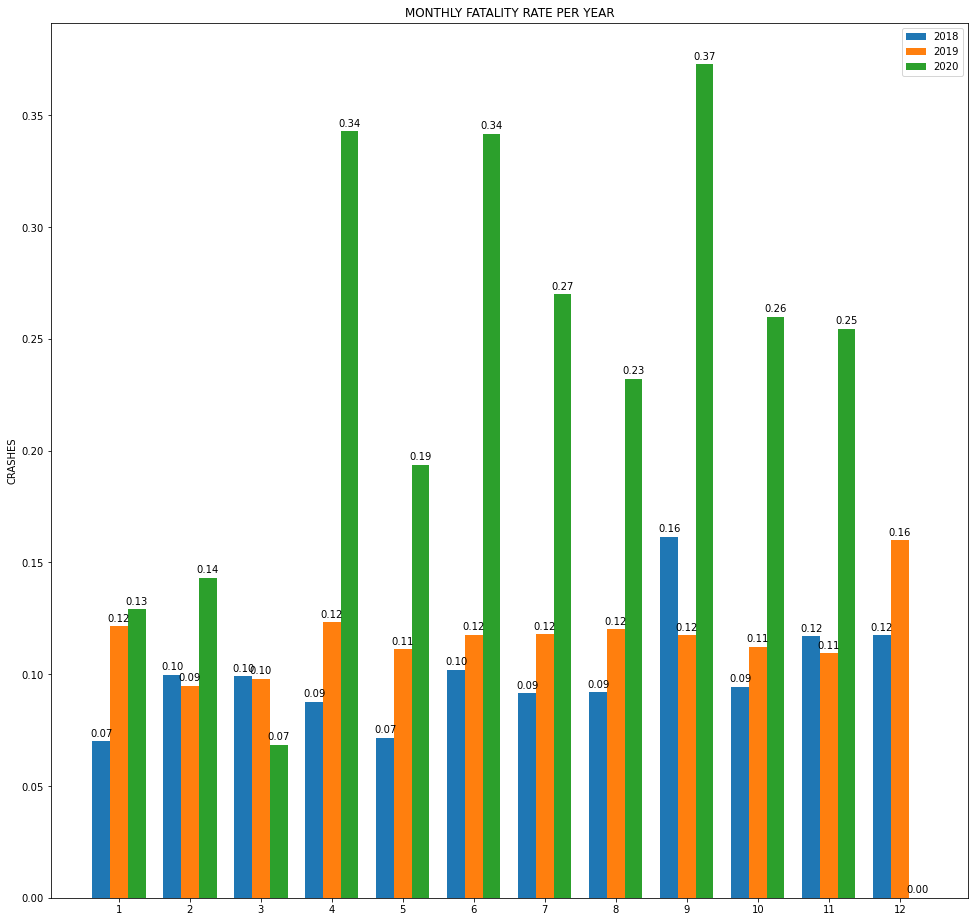

In [22]:
labels = ['1','2','3','4','5','6','7','8','9','10','11','12']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, monthly_stats_2018["FATALITY RATE"], width, label='2018')
rects2 = ax.bar(x, monthly_stats_2019["FATALITY RATE"], width, label='2019')
rects3 = ax.bar(x + width, monthly_stats_2020["FATALITY RATE"], width, label='2020')

ax.set_ylabel('CRASHES')
ax.set_title('MONTHLY FATALITY RATE PER YEAR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
fig.set_figwidth(15)
fig.set_figheight(15)

plt.show()

Fatalities are also quite different post COVID-19, and the same reasoning of skew caused by a smaller sample size likely holds.

Stress on medical infrastructure could also point to higher fatality rates.

It is interesting to note that September and December hold the maxima points for 2018 and 2019 respectively, which might correlate to end of summer break and holiday seasons, respectively.

### Dates and Car Crashes

Let us plot the frequency of crashes during dates of the calendar, as well as the related injury and fatality rates.

In [23]:
#filtering for 2020 data and defining new daily dataframe
daily_stats = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]
daily_stats = daily_stats.set_index('CRASH DATETIME').groupby(pd.Grouper(freq='D')).sum()
date_data = df.set_index('CRASH DATETIME').groupby(pd.Grouper(freq='D')).count()
daily_stats["TOTAL CRASHES"] = date_data["COLLISION_ID"]

#adding Injury Rate and Fatality Rate columns
daily_stats["INJURY RATE"] = (daily_stats["NUMBER OF PERSONS INJURED"]/daily_stats["TOTAL CRASHES"])* 100
daily_stats["FATALITY RATE"] = (daily_stats["NUMBER OF PERSONS KILLED"]/daily_stats["TOTAL CRASHES"])* 100

#moving Total Crases column to first
daily_stats = daily_stats[ ['TOTAL CRASHES'] + [ col for col in daily_stats.columns if col != 'TOTAL CRASHES' ] ]

daily_stats["TOTAL CRASHES"] = daily_stats["TOTAL CRASHES"].astype(int)
daily_stats["NUMBER OF PERSONS INJURED"] = daily_stats["NUMBER OF PERSONS INJURED"].astype(int)
daily_stats["NUMBER OF PERSONS KILLED"] = daily_stats["NUMBER OF PERSONS KILLED"].astype(int)

daily_stats

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH DATETIME,,,,,
2018-01-01,436,122,0,27.981651,0.000000
2018-01-02,610,154,0,25.245902,0.000000
2018-01-03,619,148,0,23.909532,0.000000
2018-01-04,440,57,0,12.954545,0.000000
2018-01-05,676,106,1,15.680473,0.147929
...,...,...,...,...,...
2020-11-13,322,125,2,38.819876,0.621118
2020-11-14,244,105,1,43.032787,0.409836
2020-11-15,209,79,0,37.799043,0.000000


Let's plot the daily trends.

#### <center>Daily Total Crashes By Year<center>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(<Figure size 1080x1080 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d31a50640>,
       dtype=object))

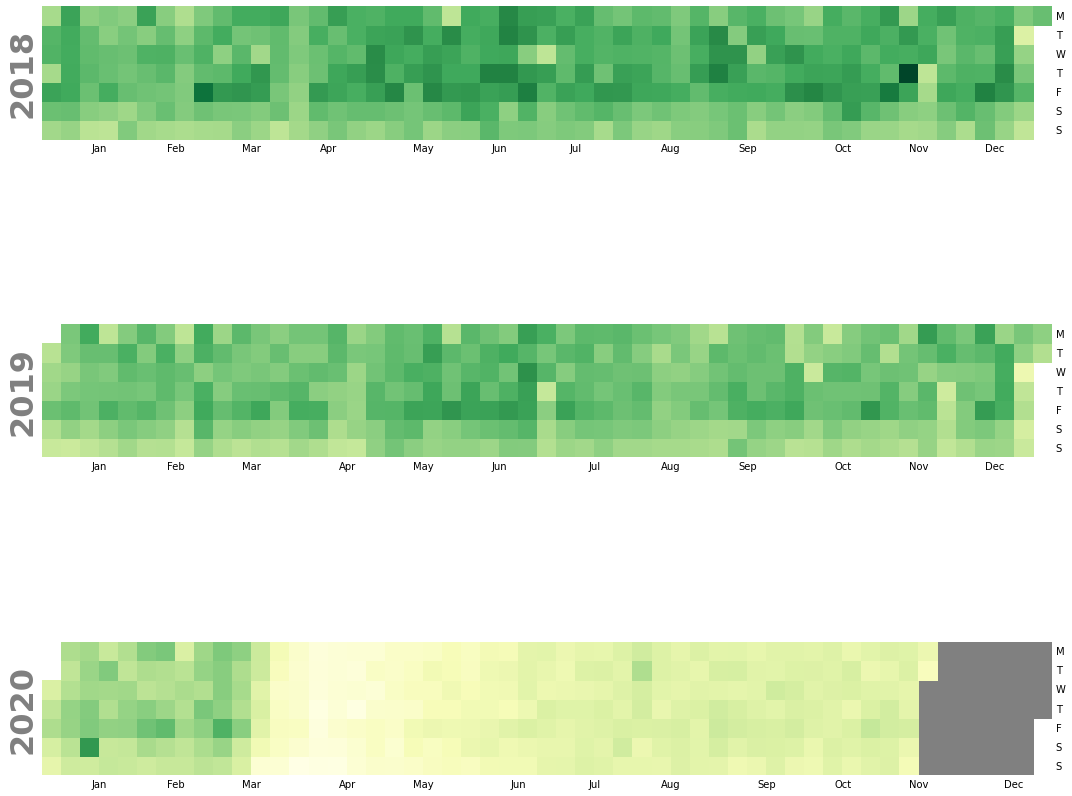

In [24]:
events = daily_stats["TOTAL CRASHES"]

calmap.calendarplot(events, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(15, 15)))

Daily Total Crashes don't seem to have any particularly outstanding features. They seem to be evenly spread, which is surprising considering one would expect more crashes during weekends, but the data actually seems to show more accidents during the middle of the week. 

Furthermore, the start of the lockdown period is quite clearly visible in 2020.

#### <center>Daily Injury Rate By Year<center>

(<Figure size 1080x1080 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d32fc7400>,
       dtype=object))

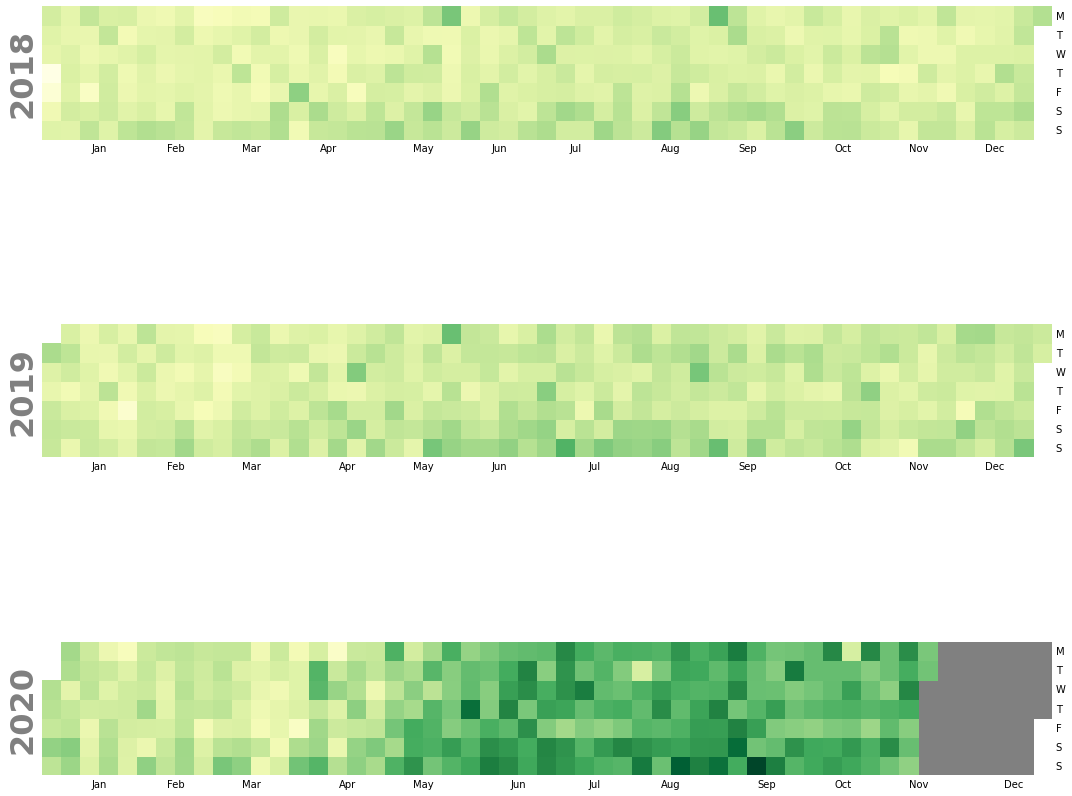

In [25]:
events = daily_stats["INJURY RATE"]

calmap.calendarplot(events, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(15, 15)))

Injury rates also don't seem to vary much, but there is a slight increase in injury rates during the weekends. Does this mean there are less accidents over the weekend, but they're more dangerous? 

Maybe party-goers and drivers under influence are represented by these darker shades.

Finally, as noted earlier, injury rates seem to be higher during 2020, but again, the sample size is way smaller so caution is advised before any implications are made.

#### <center>Daily Fatality Rate By Year<center>

(<Figure size 1080x1080 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d32fb9370>,
       dtype=object))

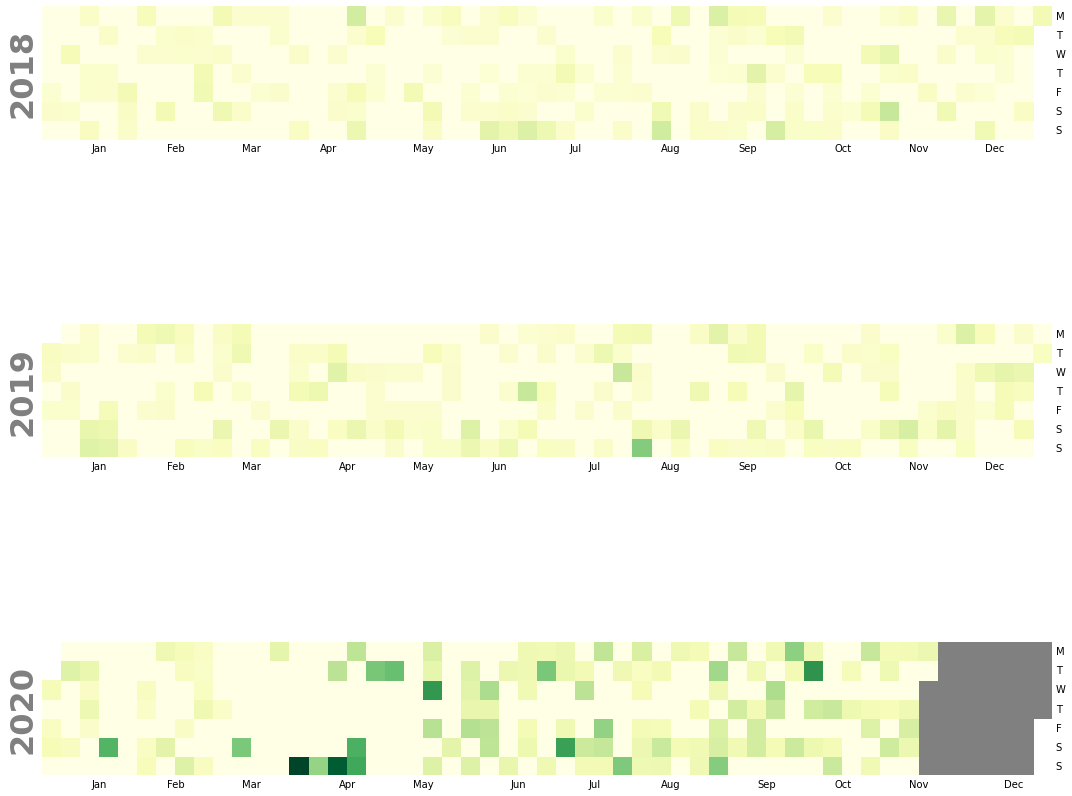

In [26]:
events = daily_stats["FATALITY RATE"]

calmap.calendarplot(events, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(15, 15)))

Fatality rates also seem to be higher over the weekend during 2018 and 2019. Not particularly surprising.

Notably, there is quite the significant spike of fatalities during April 2020, which can possibly show the impact of COVID-19 on medical infrastructure.

### Car Crashes and Time of Day Analysis

What about the significance of the time of day when it comes to car crashes? Let's find out.

In [33]:
#filtering for 2020 data and defining new daily dataframe
hourly_stats = df[["CRASH DATETIME", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]]
hourly_stats = hourly_stats.set_index('CRASH DATETIME').groupby(pd.Grouper(freq='H')).sum()
hour_data = df.set_index('CRASH DATETIME').groupby(pd.Grouper(freq='H')).count()
hourly_stats["TOTAL CRASHES"] = hour_data["COLLISION_ID"]

#moving Total Crases column to first
hourly_stats = hourly_stats[ ['TOTAL CRASHES'] + [ col for col in hourly_stats.columns if col != 'TOTAL CRASHES' ] ]

hourly_stats["TOTAL CRASHES"] = hourly_stats["TOTAL CRASHES"].astype(int)
hourly_stats["NUMBER OF PERSONS INJURED"] = hourly_stats["NUMBER OF PERSONS INJURED"].astype(int)
hourly_stats["NUMBER OF PERSONS KILLED"] = hourly_stats["NUMBER OF PERSONS KILLED"].astype(int)

hourly_stats["CRASH HOUR"] = hourly_stats.index.hour
hourly_stats = hourly_stats.set_index('CRASH HOUR')
hourly_stats = hourly_stats.groupby('CRASH HOUR', as_index= True).sum()

#adding Injury Rate and Fatality Rate columns
hourly_stats["INJURY RATE"] = (hourly_stats["NUMBER OF PERSONS INJURED"]/hourly_stats["TOTAL CRASHES"])* 100
hourly_stats["FATALITY RATE"] = (hourly_stats["NUMBER OF PERSONS KILLED"]/hourly_stats["TOTAL CRASHES"])* 100

hourly_stats

,TOTAL CRASHES,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,INJURY RATE,FATALITY RATE
CRASH HOUR,,,,,
0,18140,6227,35,34.327453,0.192944
1,8286,2936,23,35.433261,0.277577
2,6165,2306,17,37.404704,0.275750
3,5503,2133,30,38.760676,0.545157
4,6127,2308,34,37.669332,0.554921
5,6957,2334,27,33.548944,0.388098
6,11638,3489,20,29.979378,0.171851
7,16383,4644,24,28.346457,0.146493
8,27444,6922,21,25.222271,0.076519


#### <center>Total Crashes by Hour</center>

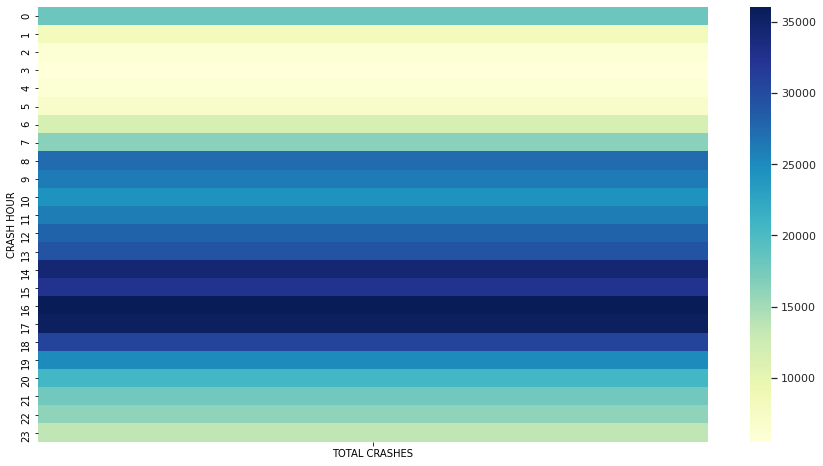

In [28]:
heatmap_pt = pd.pivot_table(hourly_stats,values=["TOTAL CRASHES"], index=["CRASH HOUR"])

fig, ax = plt.subplots(figsize=(15,8))

sns.set()

ax = sns.heatmap(heatmap_pt, cmap="YlGnBu")

plt.show()

We see that there is a spike in the number of crashes around 4 to 5 p.m., which coincides with the time most people would get off of work.

#### <center>Injury Rate by Hour</center>

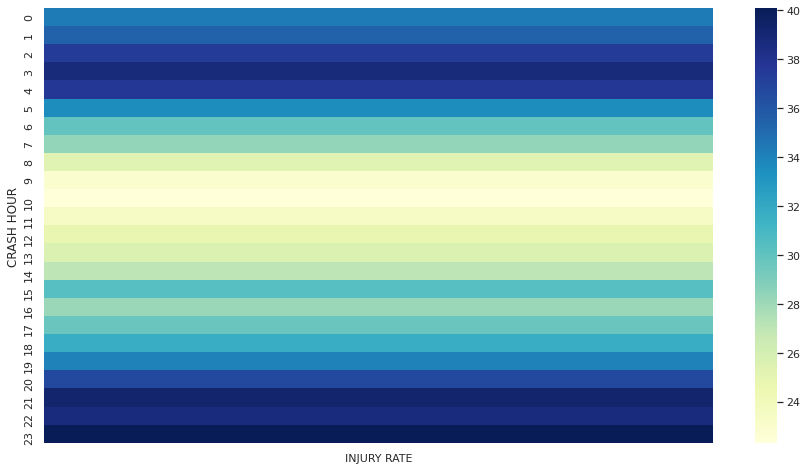

In [29]:
heatmap_pt = pd.pivot_table(hourly_stats,values=["INJURY RATE"], index=["CRASH HOUR"])

fig, ax = plt.subplots(figsize=(15,8))

sns.set()

ax = sns.heatmap(heatmap_pt, cmap="YlGnBu")

plt.show()

We can see crashes that occur late at night are much more likely to injure. Especially at 11 p.m. and 3 a.m.

#### <center>Fatality Rate by Hour</center>

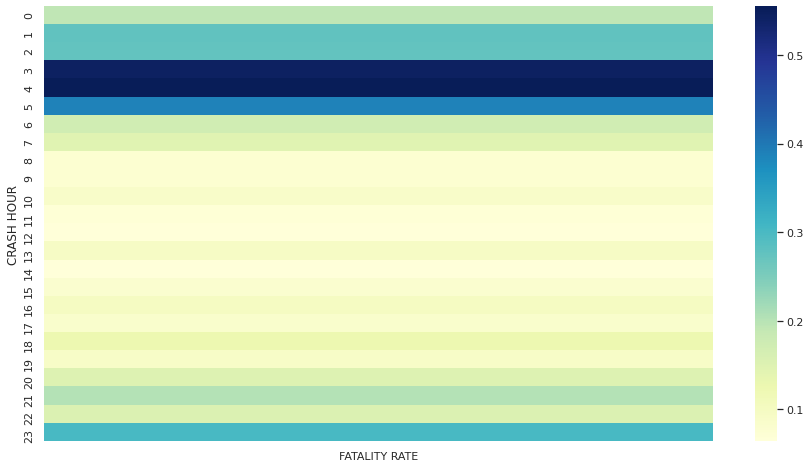

In [30]:
heatmap_pt = pd.pivot_table(hourly_stats,values=["FATALITY RATE"], index=["CRASH HOUR"])

fig, ax = plt.subplots(figsize=(15,8))

sns.set()

ax = sns.heatmap(heatmap_pt, cmap="YlGnBu")

plt.show()

Similar to injuries, we can see late night hours resulting in deadlier crashes, especially around 3 a.m. This suggests high speed collisions on empty roads by sleepy late night drivers.

### Most Common Causes

Let's explore the different causes of collisions mentioned in the dataset and their frequencies.

#### <center>Top 10 Causes of Crashes</center>

In [58]:
#defining new dataframe for causes
common_causes = df[["CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].copy()
common_causes.index.names = ['Cause']

#merging and summing two causes columns
count_1 = df.set_index('CRASH DATETIME').groupby(pd.Grouper(key="CONTRIBUTING FACTOR VEHICLE 1")).count()
count_2 = df.set_index('CRASH DATETIME').groupby(pd.Grouper(key="CONTRIBUTING FACTOR VEHICLE 2")).count()
count_1.index.names = ['Cause']
count_2.index.names = ['Cause']
count = count_1 + count_2

common_causes_1 = common_causes.groupby(["CONTRIBUTING FACTOR VEHICLE 1"]).sum()
common_causes_2 = common_causes.groupby(["CONTRIBUTING FACTOR VEHICLE 2"]).sum()
common_causes = common_causes_1 + common_causes_2

common_causes.loc[:,"TOTAL CRASHES"] = count["COLLISION_ID"]

#setting common index name
common_causes_1.index.names = ['Cause']
common_causes_2.index.names = ['Cause']

#filling NaNs
common_causes = common_causes.fillna(0)

#coverting all values to integers
common_causes = common_causes.astype("int64")

#adding Injury Rate and Fatality Rate columns
common_causes["INJURY RATE"] = (common_causes["NUMBER OF PERSONS INJURED"]/common_causes["TOTAL CRASHES"])* 100
common_causes["FATALITY RATE"] = (common_causes["NUMBER OF PERSONS KILLED"]/common_causes["TOTAL CRASHES"])* 100

#filling NaNs again
common_causes = common_causes.fillna(0)

common_causes[:10]

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,TOTAL CRASHES,INJURY RATE,FATALITY RATE
Accelerator Defective,132,0,278,47.482014,0.000000
Aggressive Driving/Road Rage,1235,4,2858,43.212036,0.139958
Alcohol Involvement,2783,16,5694,48.876010,0.280998
Animals Action,93,0,470,19.787234,0.000000
Backing Unsafely,2737,14,25570,10.703950,0.054752
Brakes Defective,1021,0,1899,53.765140,0.000000
Cell Phone (hand-Held),110,0,211,52.132701,0.000000
Cell Phone (hands-free),19,0,30,63.333333,0.000000
Driver Inattention/Distraction,48516,80,157195,30.863577,0.050892
Driver Inexperience,2762,18,9250,29.859459,0.194595


We see that Driver Inattention/Distraction is by far the most common cause of crash. This is to be expected.

Also, this might indicate a fair bit of laziness on the data filler's part, as the top reason is also a very general one.

Let's plot our findings.

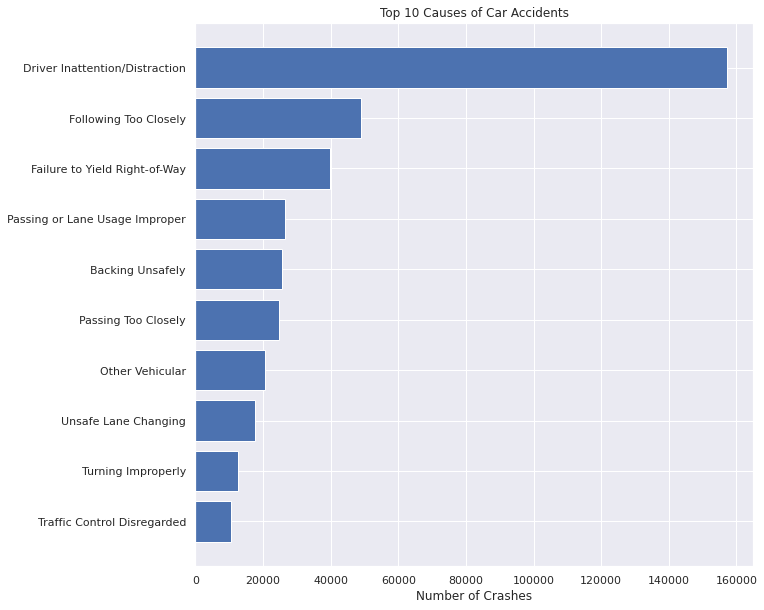

In [59]:
top_crash_causes = common_causes.sort_values(by = ['TOTAL CRASHES'], ascending = False)

top_crash_causes = top_crash_causes[:10]

fig, ax = plt.subplots()

ax.barh(top_crash_causes.index.tolist(), top_crash_causes["TOTAL CRASHES"], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crashes')
ax.set_title('Top 10 Causes of Car Accidents')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

#### <center>Top 10 Causes of Injuries</center>

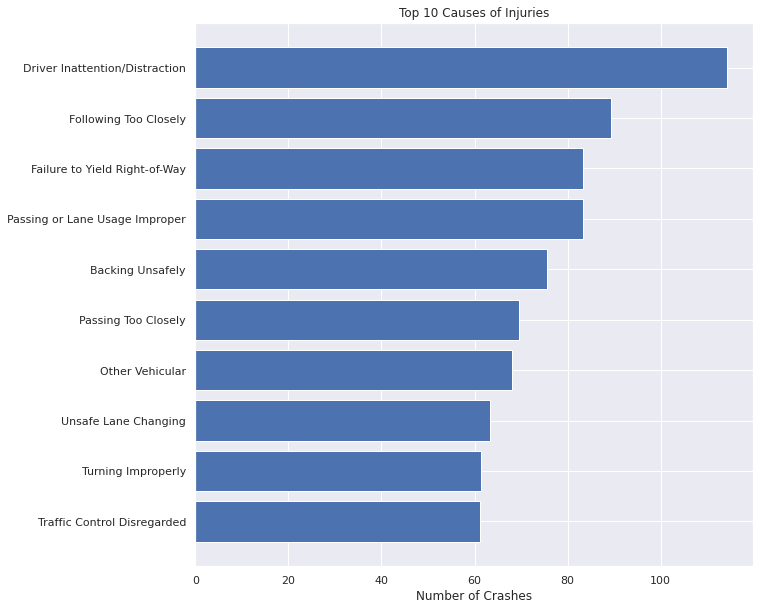

In [60]:
top_injury_causes = common_causes.sort_values(by = ['INJURY RATE'], ascending = False)

top_injury_causes = top_injury_causes[:10]

fig, ax = plt.subplots()

ax.barh(top_crash_causes.index.tolist(), top_injury_causes["INJURY RATE"], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crashes')
ax.set_title('Top 10 Causes of Injuries')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

#### <center>Top 10 Causes of Fatalities</center>

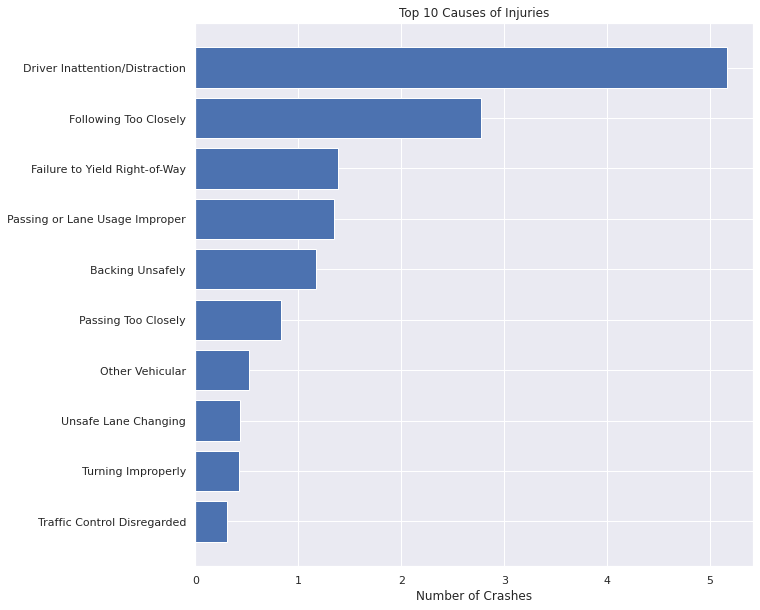

In [61]:
top_fatality_causes = common_causes.sort_values(by = ['FATALITY RATE'], ascending = False)

top_fatality_causes = top_fatality_causes[:10]

fig, ax = plt.subplots()

ax.barh(top_crash_causes.index.tolist(), top_fatality_causes["FATALITY RATE"], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crashes')
ax.set_title('Top 10 Causes of Injuries')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

We see a similar distribution of causes when it comes to both injury and fatality rates.

### Most Common Vehicles

We want to find out the top 10 vehicles that are involved in a car crash. Intuition says sedans and common passenger cars would be at the top due to their popularity. Let's find out.

In [62]:
#defining new dataframe for causes
common_vehicles = df[["VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].copy()
common_vehicles.index.names = ['Vehicle']

#merging and summing two causes columns

count_1 = df.set_index('CRASH DATETIME').groupby(pd.Grouper(key="VEHICLE TYPE CODE 1")).count()
count_2 = df.set_index('CRASH DATETIME').groupby(pd.Grouper(key="VEHICLE TYPE CODE 2")).count()
count_1.index.names = ['Vehicle']
count_2.index.names = ['Vehicle']
count = count_1 + count_2

common_vehicles_1 = common_vehicles.groupby(["VEHICLE TYPE CODE 1"]).sum()
common_vehicles_2 = common_vehicles.groupby(["VEHICLE TYPE CODE 2"]).sum()
common_vehicles = common_vehicles_1 + common_vehicles_2

common_vehicles.loc[:,"TOTAL CRASHES"] = count["COLLISION_ID"]

#setting common index name
common_vehicles_1.index.names = ['Vehicle']
common_vehicles_2.index.names = ['Vehicle']

#filling NaNs
common_vehicles = common_vehicles.fillna(0)

#coverting all values to integers
common_vehicles = common_vehicles.astype("int64")

#adding Injury Rate and Fatality Rate columns
common_vehicles["INJURY RATE"] = (common_vehicles["NUMBER OF PERSONS INJURED"]/common_vehicles["TOTAL CRASHES"])* 100
common_vehicles["FATALITY RATE"] = (common_vehicles["NUMBER OF PERSONS KILLED"]/common_vehicles["TOTAL CRASHES"])* 100

#filling NaNs again
common_vehicles = common_vehicles.fillna(0)

#there are outliers due to spelling mistakes and such, so we'll only consider the top values
common_vehicles = common_vehicles.sort_values(by = "TOTAL CRASHES", ascending = False)

common_vehicles[:10]

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,TOTAL CRASHES,INJURY RATE,FATALITY RATE
Sedan,118537,285,395754,29.952193,0.072014
Station Wagon/Sport Utility Vehicle,90742,304,322582,28.129902,0.094240
Taxi,11354,21,40795,27.831842,0.051477
Pick-up Truck,5662,22,28115,20.138716,0.078250
Box Truck,2679,23,21409,12.513429,0.107431
Bike,13198,53,15961,82.689055,0.332059
Bus,3672,22,15062,24.379233,0.146063
Tractor Truck Diesel,1105,14,7643,14.457674,0.183174
Van,1062,6,6014,17.658796,0.099767
Motorcycle,3090,91,4904,63.009788,1.855628


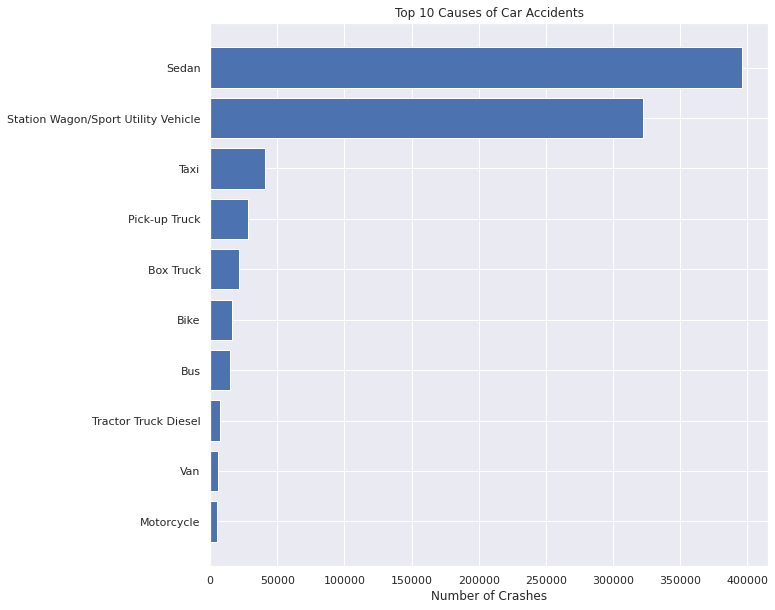

In [63]:
top_crash_vehicles = common_vehicles.sort_values(by = ['TOTAL CRASHES'], ascending = False)

top_crash_vehicles = top_crash_vehicles[:10]

fig, ax = plt.subplots()

ax.barh(top_crash_vehicles.index.tolist(), top_crash_vehicles["TOTAL CRASHES"], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crashes')
ax.set_title('Top 10 Vehicles in Car Accidents')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

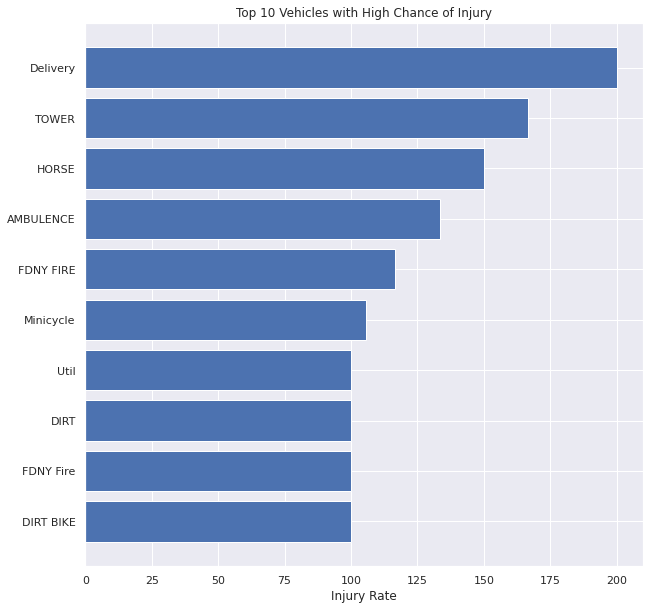

In [68]:
top_injury_vehicles = common_vehicles.sort_values(by = ['INJURY RATE'], ascending = False)

top_injury_vehicles = top_injury_vehicles[:10]

fig, ax = plt.subplots()

ax.barh(top_injury_vehicles.index.tolist(), top_injury_vehicles["INJURY RATE"], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Injury Rate')
ax.set_title('Top 10 Vehicles with High Chance of Injury')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

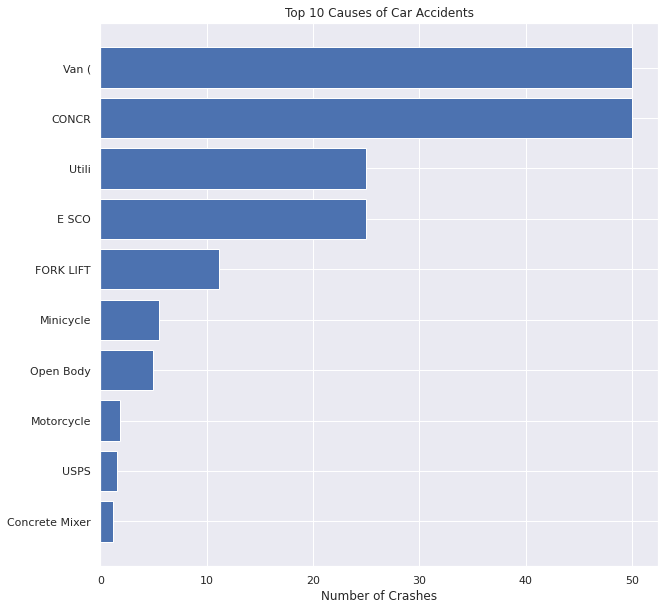

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,TOTAL CRASHES,INJURY RATE,FATALITY RATE
Van (,0,1,2,0.000000,50.000000
CONCR,0,1,2,0.000000,50.000000
Utili,3,1,4,75.000000,25.000000
E SCO,3,1,4,75.000000,25.000000
FORK LIFT,2,1,9,22.222222,11.111111
Minicycle,19,1,18,105.555556,5.555556
Open Body,38,3,61,62.295082,4.918033
Motorcycle,3090,91,4904,63.009788,1.855628
USPS,16,1,66,24.242424,1.515152
Concrete Mixer,109,5,430,25.348837,1.162791


In [69]:
top_fatality_vehicles = common_vehicles.sort_values(by = ['FATALITY RATE'], ascending = False)

top_fatality_vehicles = top_fatality_vehicles[:10]

fig, ax = plt.subplots()

ax.barh(top_fatality_vehicles.index.tolist(), top_fatality_vehicles["FATALITY RATE"], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crashes')
ax.set_title('Top 10 Causes of Car Accidents')

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()
top_fatality_vehicles